# Traces visualization

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from utils.statistic_utils import root_mean_square

In [27]:
def plot_traces__width(test_dataset, environment, distance, device):
    path = f"datasets/test_traces/{test_dataset}/{environment}/{distance}m/device_{device}"
    
    raw_data_dir = os.getenv("MASTER_THESIS_RESULTS_RAW_DATA")
    original_data = os.path.join(raw_data_dir, path)
    
    project_dir = os.getenv("MASTER_THESIS_RESULTS")
    processed_data = os.path.join(project_dir, path, "data")

    all_avg = []
    all_std = []
    all__traces = [x for x in np.array(os.listdir(original_data)) if x[0:3] == "all"]
    for i in all__traces:
        try:
            trace = np.load(os.path.join(original_data, i))
            if len(trace) == 0:
                print(i)
                continue
            all_avg.append(trace.mean())
            all_std.append(trace.std())
        except:
            print(i)
    all_avg = np.array(all_avg)
    all_std = np.array(all_std)

    data = np.load(os.path.join(processed_data, "traces.npy"))
    data_mean = []
    data_std = []
    for i in range(len(data)):
        trace = data[i]
        data_mean.append(trace.mean())
        data_std.append(trace.std())
    data_mean = np.array(data_mean)
    data_std = np.array(data_std)

    plt.figure(figsize=(25,10))
    plt.subplot(1,4,1)
    plt.plot(all_avg)
    plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
    #plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)

    plt.subplot(1,4,2)
    plt.plot(all_std)
    plt.axhline(y=all_std.mean(), color='r', linestyle='-')

    plt.subplot(1,4,3)
    plt.plot(data_mean)
    plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
    #plt.ylim(data_mean.mean()*0.9,all_avg.mean()*1.1)

    plt.subplot(1,4,4)
    plt.plot(data_std)
    plt.axhline(y=data_std.mean(), color='r', linestyle='-')
    plt.show()

In [28]:
def plot_training_traces_width__maxmin():
    path = f"datasets/training_traces/Wang_2021/Cable/data"
    raw_data_dir = os.getenv("MASTER_THESIS_RESULTS_RAW_DATA")
    data_path = os.path.join(raw_data_dir, path)

    data = np.load(os.path.join(data_path, "nor_traces_maxmin.npy"))
    data_mean = []
    data_std = []
    data_dyn_range = []
    for i in range(len(data)):
        trace = data[i]
        data_mean.append(trace.mean())
        data_std.append(trace.std())
        data_dyn_range.append(trace[204:314].max() - trace[204:314].min())
    data_mean = np.array(data_mean)
    data_std = np.array(data_std)
    data_dyn_range = np.array(data_dyn_range)

    plt.figure(figsize=(25,10))
    
    plt.subplot(1,3,1)
    plt.plot(data_mean)
    plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
    #plt.ylim(data_mean.mean()*0.9,all_avg.mean()*1.1)
    
    plt.subplot(1,3,2)
    plt.plot(data_std)
    plt.axhline(y=data_std.mean(), color='r', linestyle='-')
    
    plt.subplot(1,3,3)
    plt.plot(data_dyn_range)
    plt.axhline(y=data_dyn_range.mean(), color='r', linestyle='-')
    plt.show()

In [31]:
def plot_training_traces_width__raw_data():
    devices = [1, 2, 3, 4, 5]
    for device in devices:
        path = f"datasets/training_traces/Wang_2021/Cable/original_data/20k_d{device}/100avg"
        raw_data_dir = os.getenv("MASTER_THESIS_RESULTS_RAW_DATA")
        data_path = os.path.join(raw_data_dir, path)

        data = np.load(os.path.join(data_path, "traces.npy"))
        data_mean = []
        data_std = []
        data_dyn_range = []
        for i in range(len(data)):
            trace = data[i]
            data_mean.append(trace.mean())
            data_std.append(trace.std())
            data_dyn_range.append(trace[204:314].max() - trace[204:314].min())
        data_mean = np.array(data_mean)
        data_std = np.array(data_std)
        data_dyn_range = np.array(data_dyn_range)

        plt.figure(figsize=(25,10))

        plt.subplot(1,3,1)
        plt.plot(data_mean)
        plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
        #plt.ylim(data_mean.mean()*0.9,all_avg.mean()*1.1)

        plt.subplot(1,3,2)
        plt.plot(data_std)
        plt.axhline(y=data_std.mean(), color='r', linestyle='-')

        plt.subplot(1,3,3)
        plt.plot(data_dyn_range)
        plt.axhline(y=data_dyn_range.mean(), color='r', linestyle='-')
        plt.show()

## Training traces

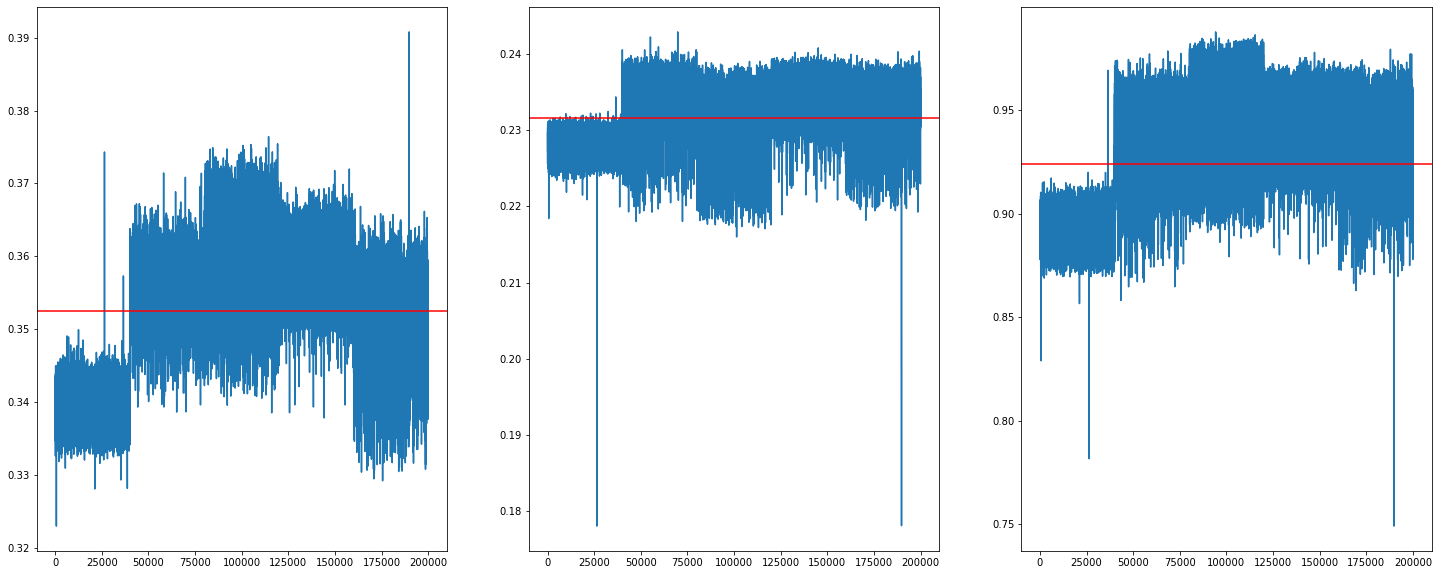

In [25]:
plot_training_traces_width__maxmin()

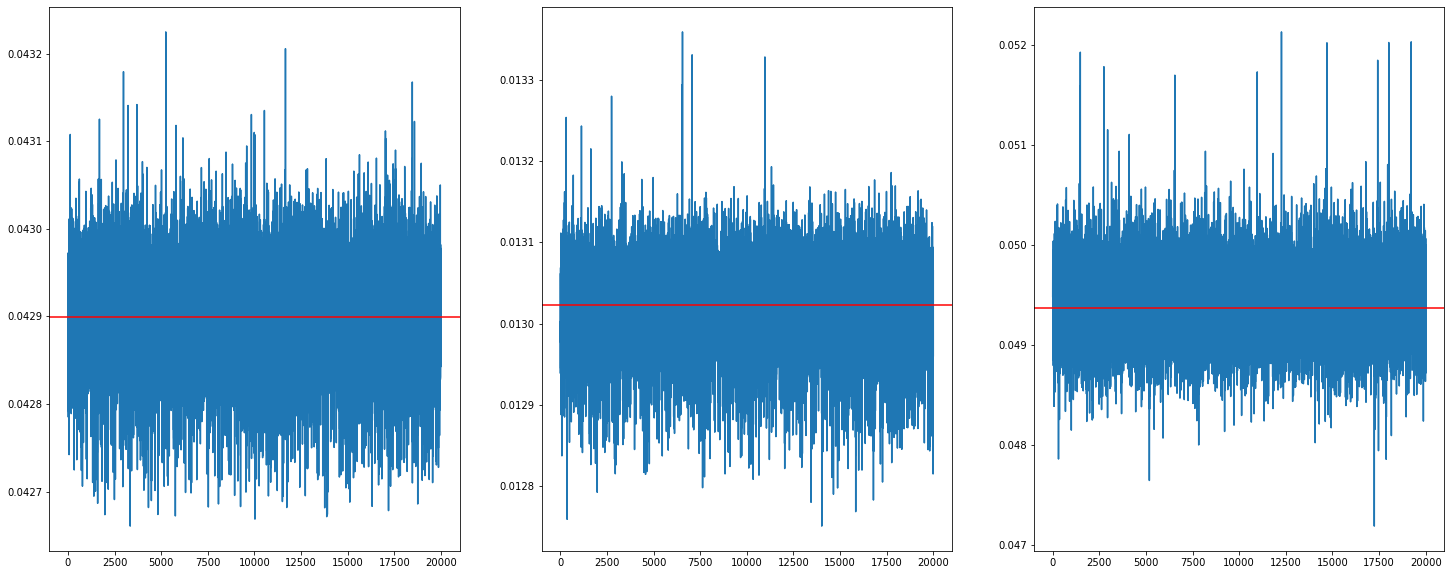

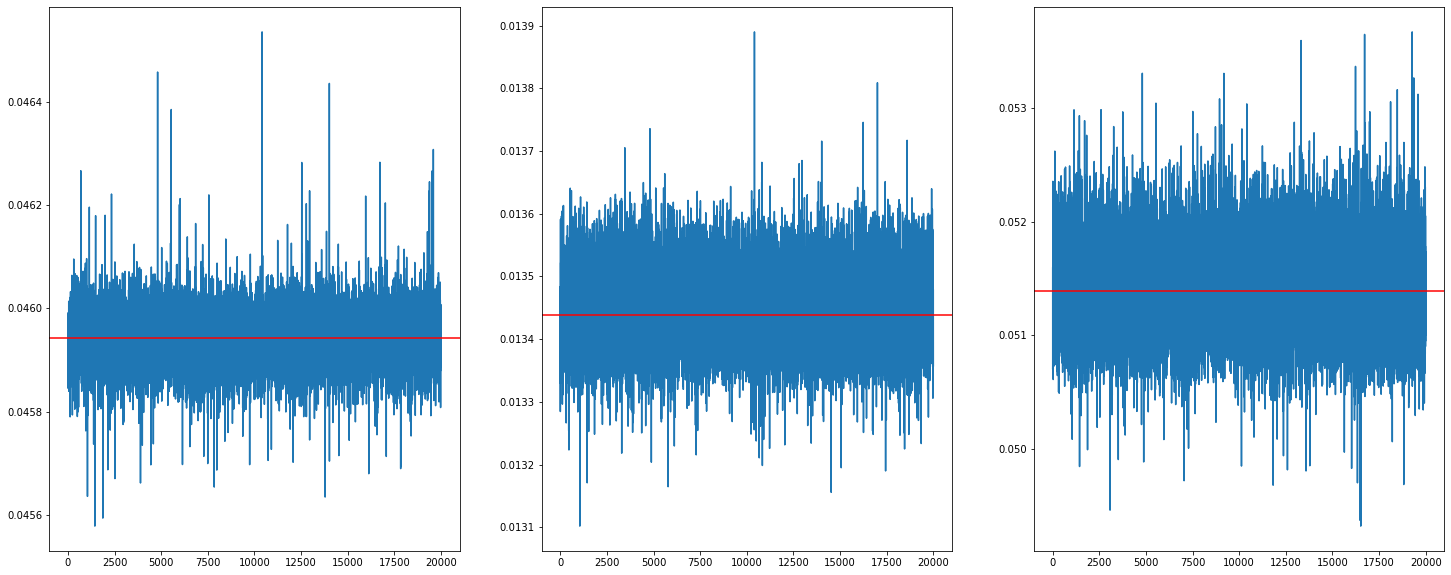

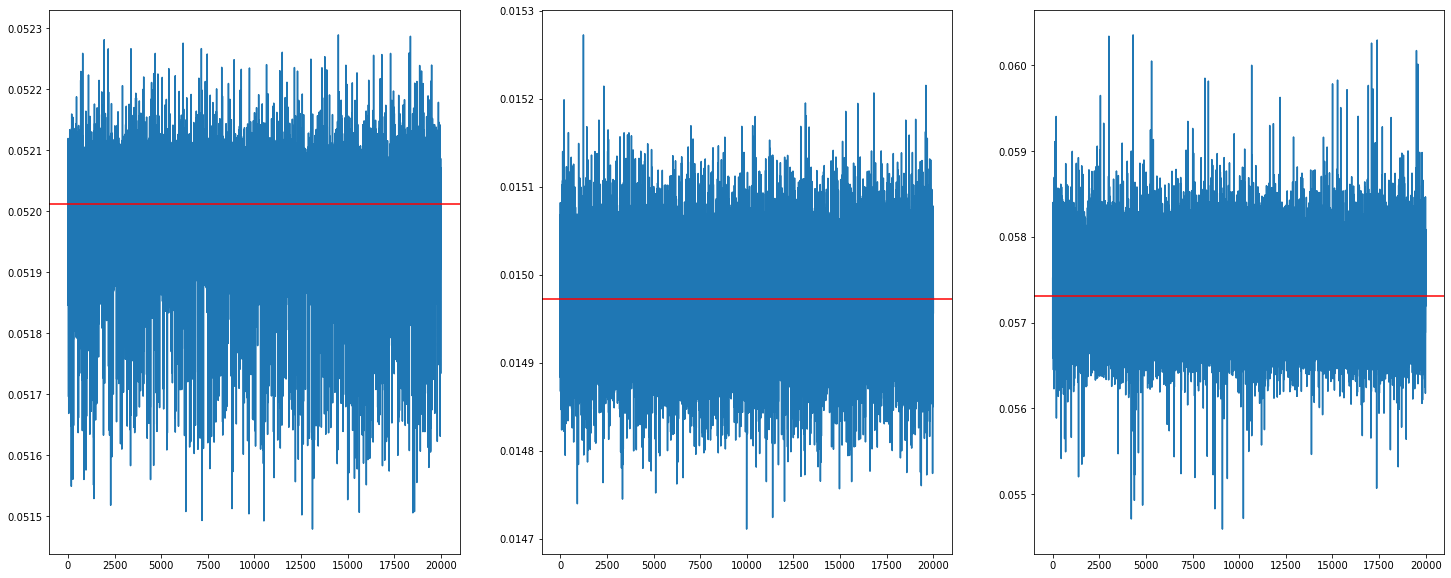

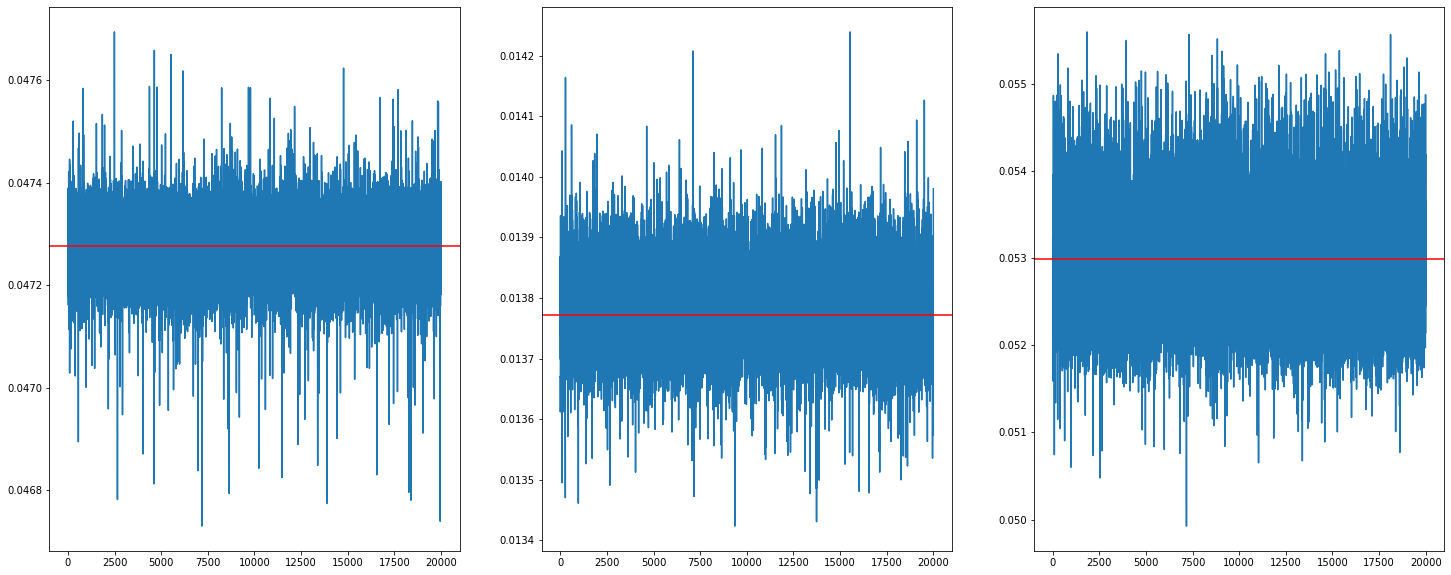

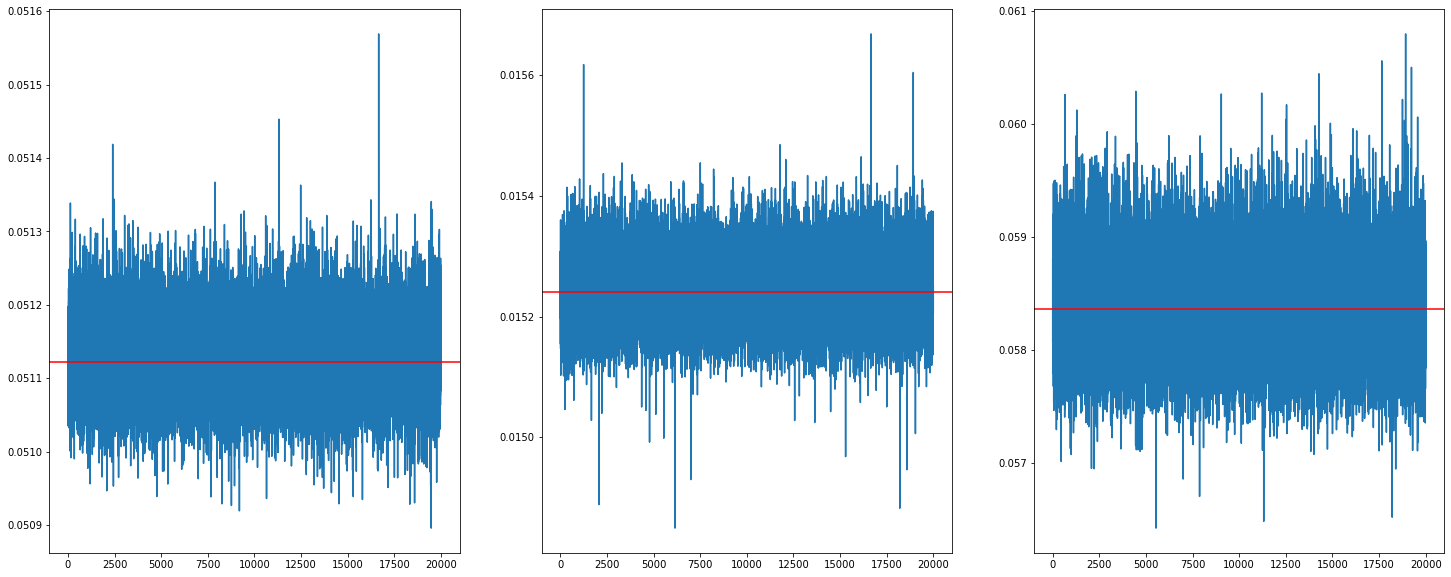

In [32]:
plot_training_traces_width__raw_data()

### Device 6

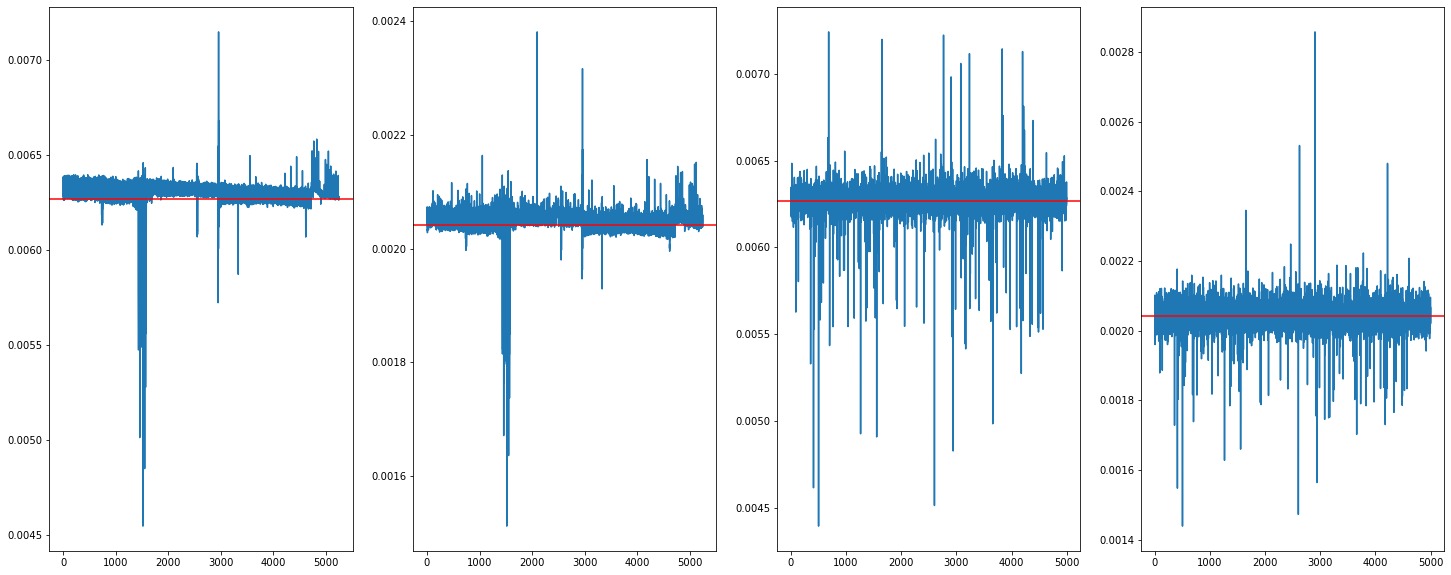

In [3]:
plot_traces__width("Wang_2021", "office_corridor", 15, 6)

### Device 7

all__560.npy


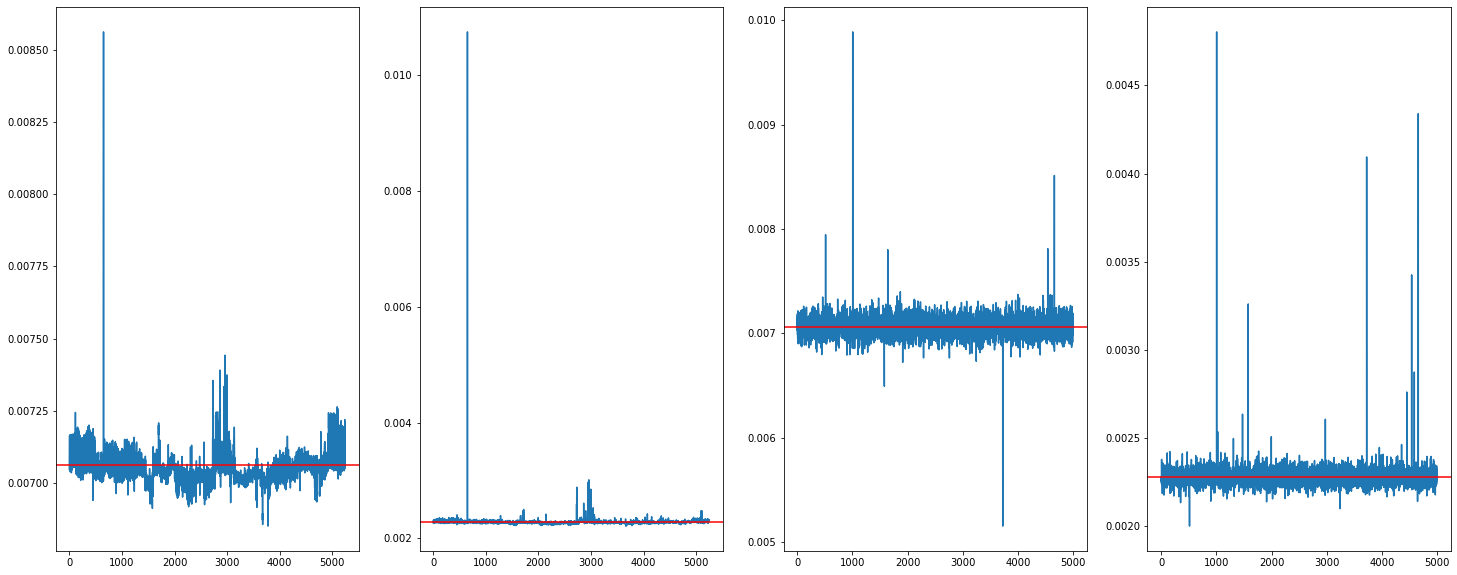

In [4]:
plot_traces__width("Wang_2021", "office_corridor", 15, 7)

### Device 8

all__3962.npy


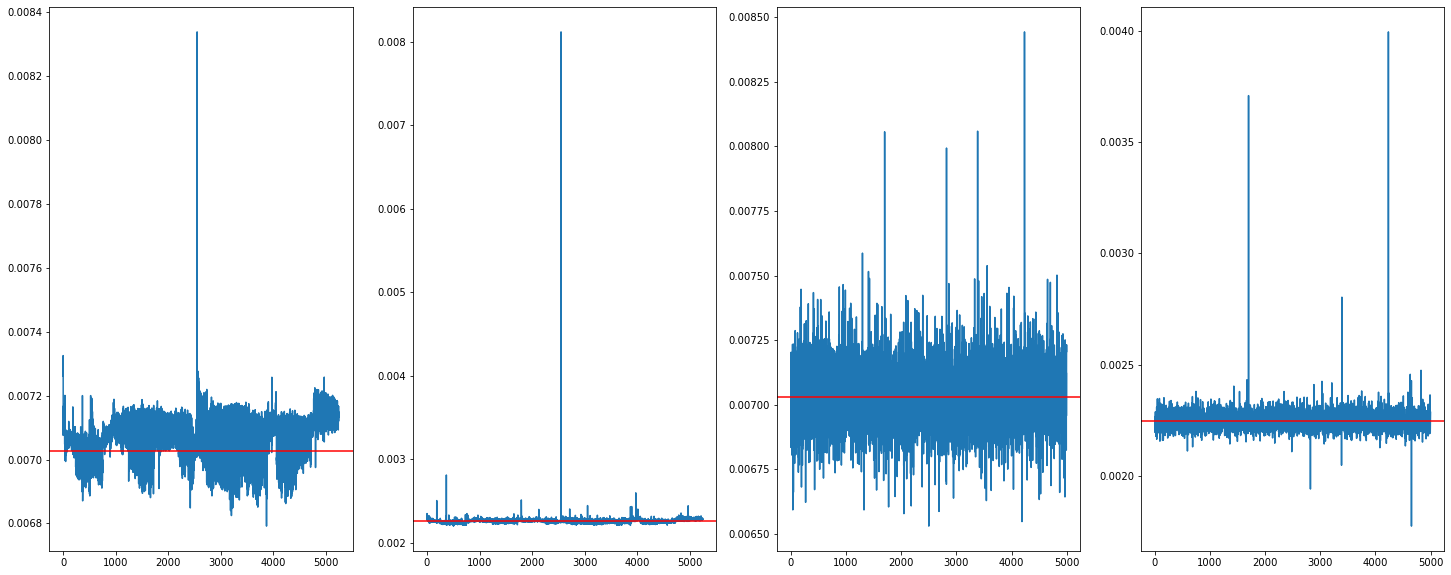

In [5]:
plot_traces__width("Wang_2021", "office_corridor", 15, 8)

### Device 9

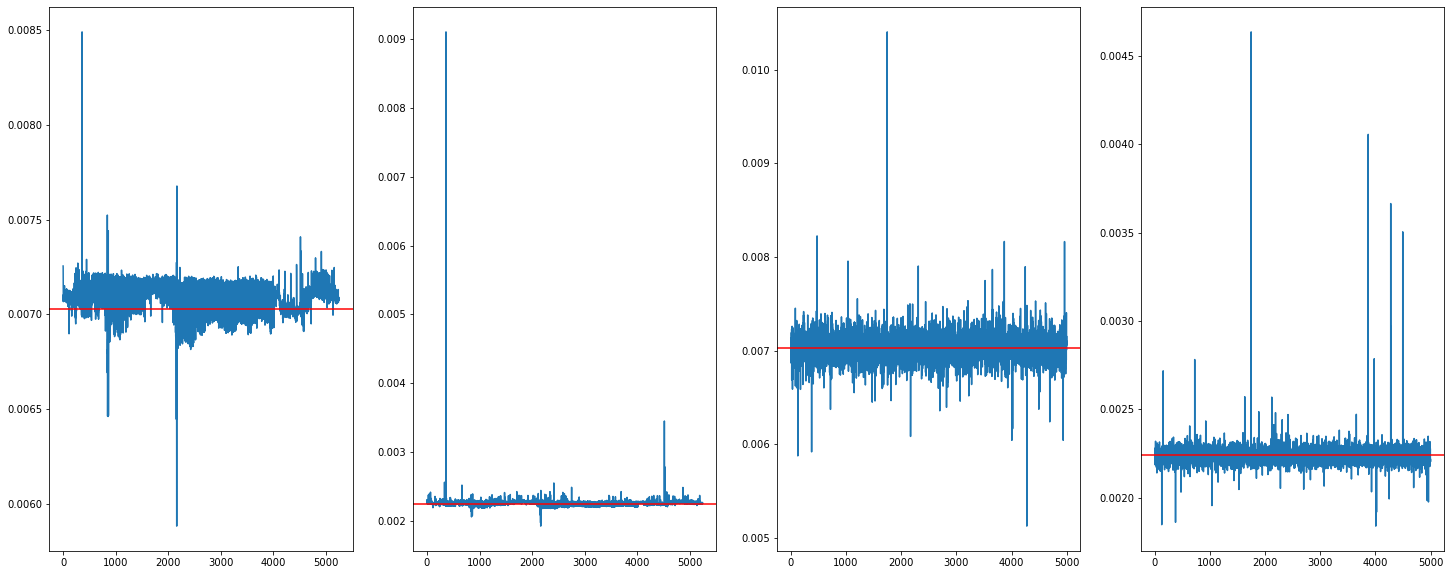

In [6]:
plot_traces__width("Wang_2021", "office_corridor", 15, 9)

### Device 10

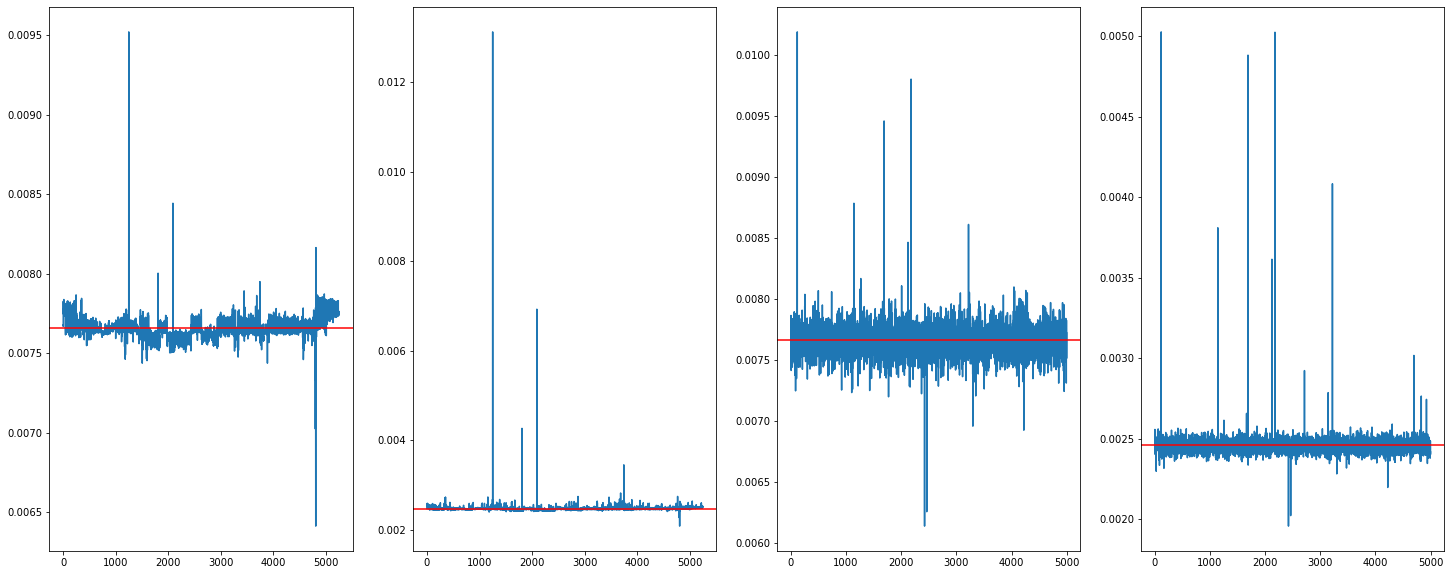

In [7]:
plot_traces__width("Wang_2021", "office_corridor", 15, 10)

## Zedigh_2021

### 2.5m - Device 9

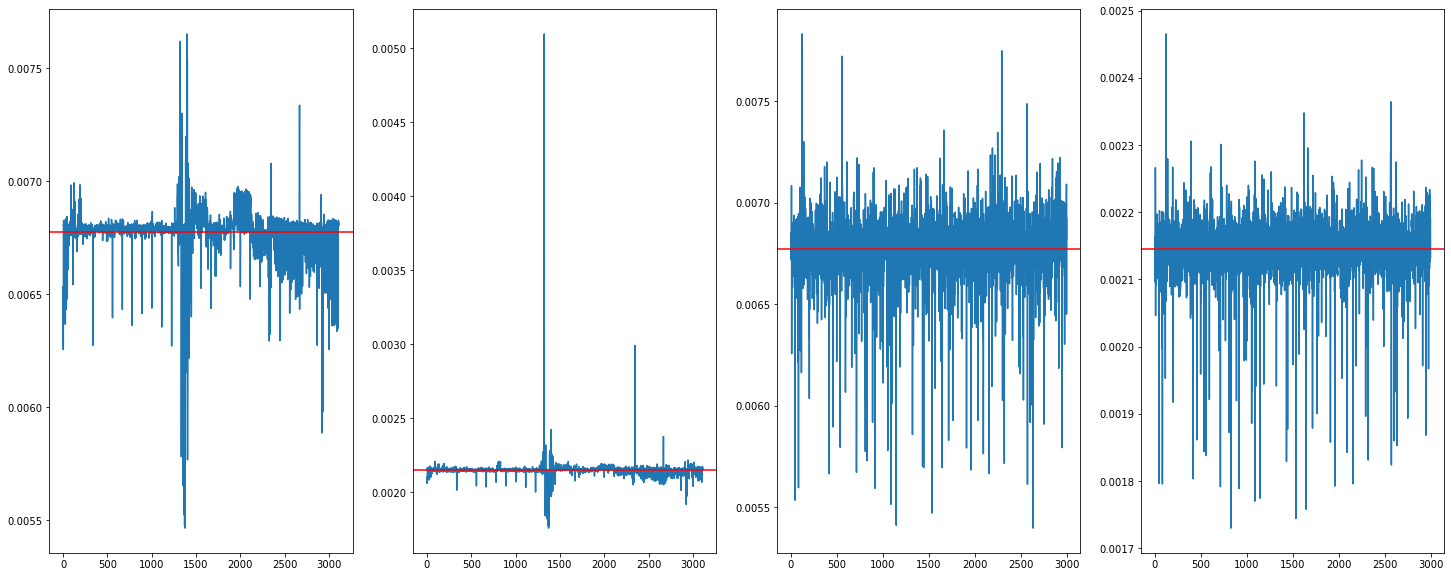

In [8]:
plot_traces__width("Zedigh_2021", "office_corridor", 2, 9)

### 2.5m - Device 10

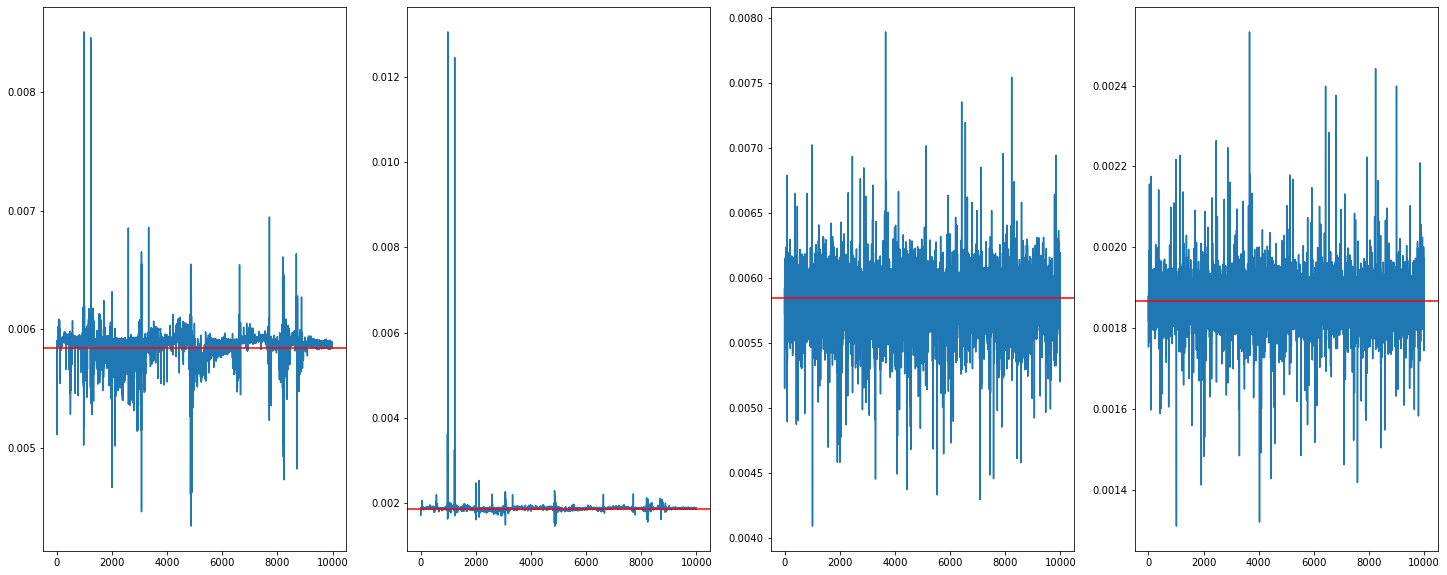

In [9]:
plot_traces__width("Zedigh_2021", "office_corridor", 2, 10)

### 5m - Device 8

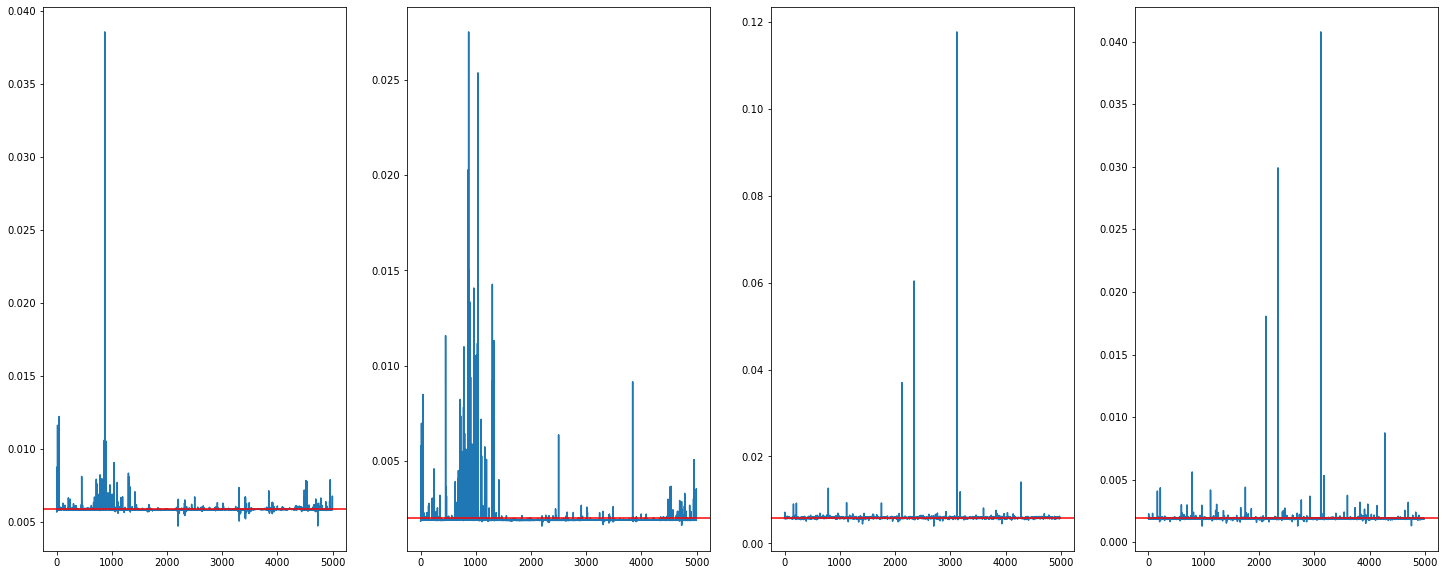

In [10]:
plot_traces__width("Zedigh_2021", "office_corridor", 5, 8)

### 5m - Device 9

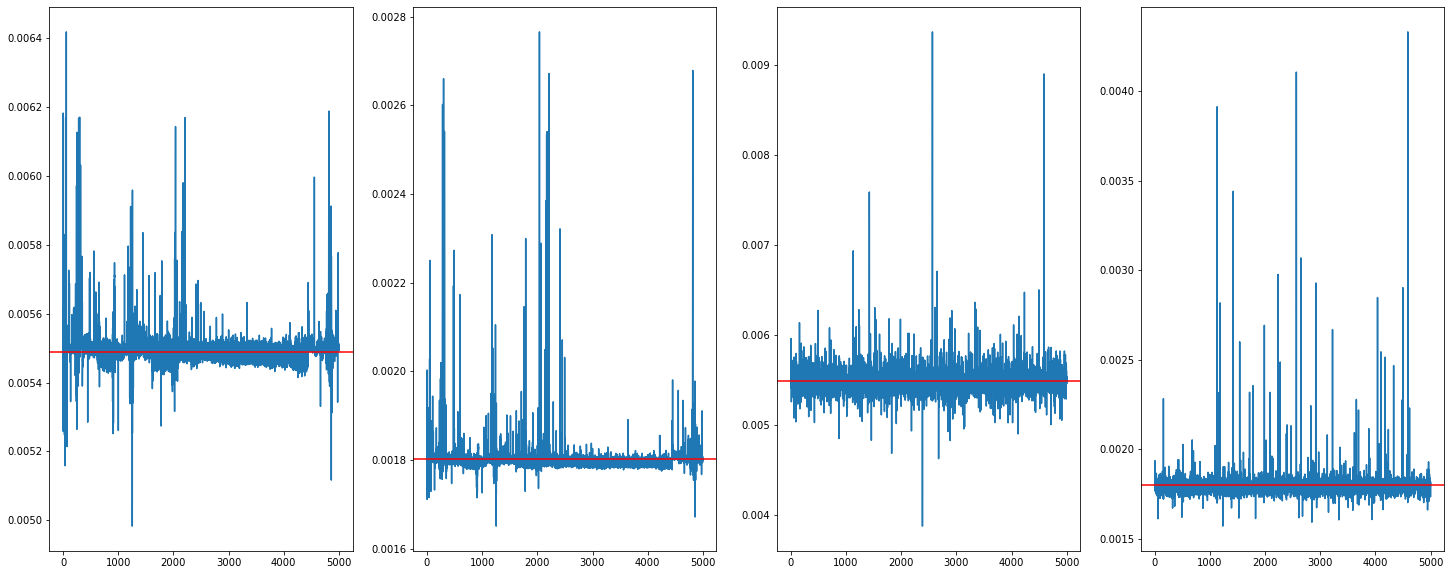

In [11]:
plot_traces__width("Zedigh_2021", "office_corridor", 5, 9)

### 5m - Device 10

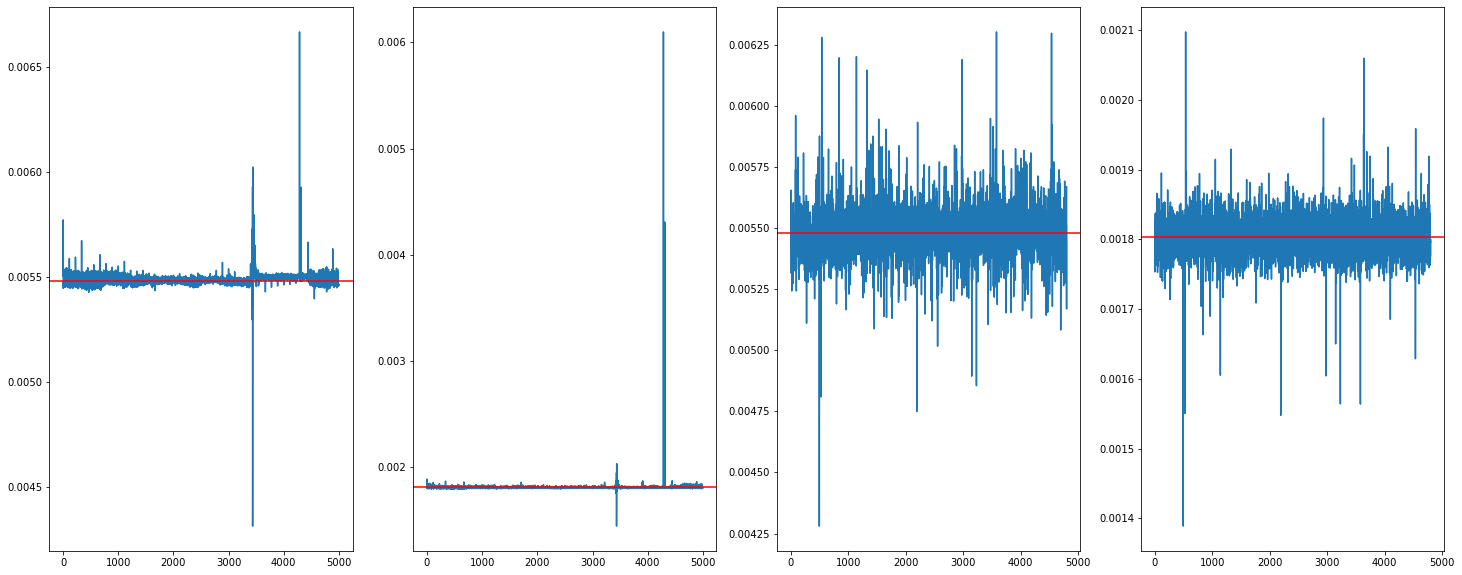

In [12]:
plot_traces__width("Zedigh_2021", "office_corridor", 5, 10)

### 10m - Device 8

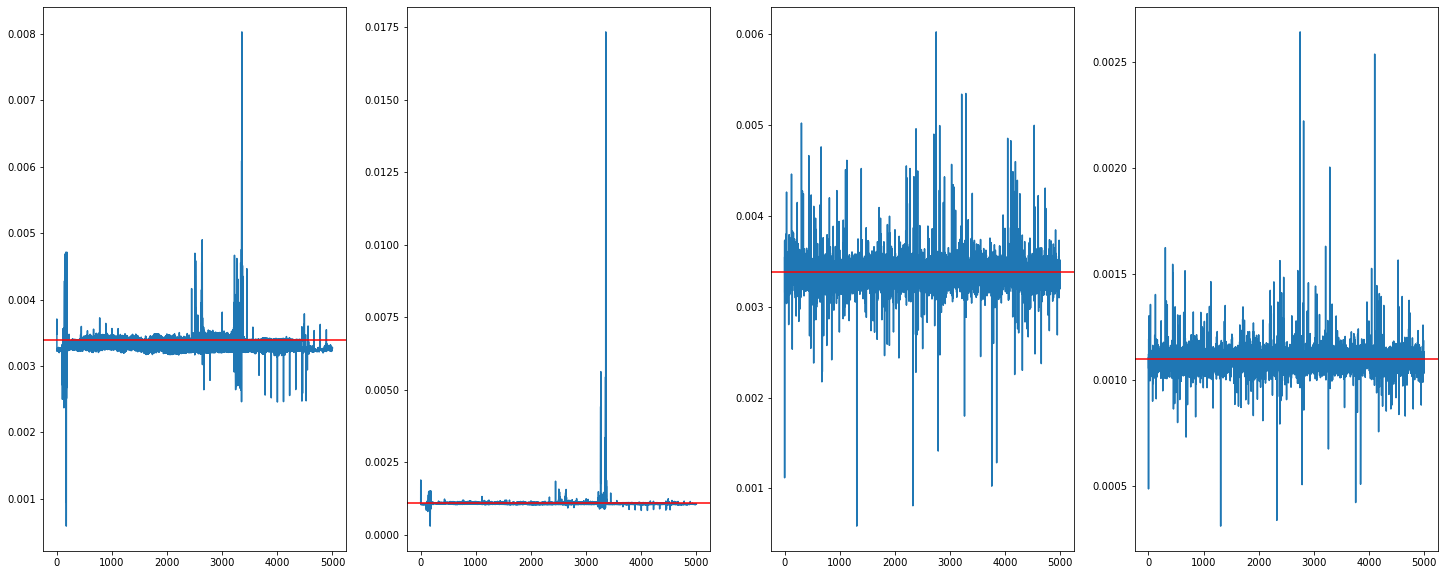

In [13]:
plot_traces__width("Zedigh_2021", "office_corridor", 10, 8)

### 10m - Device 9

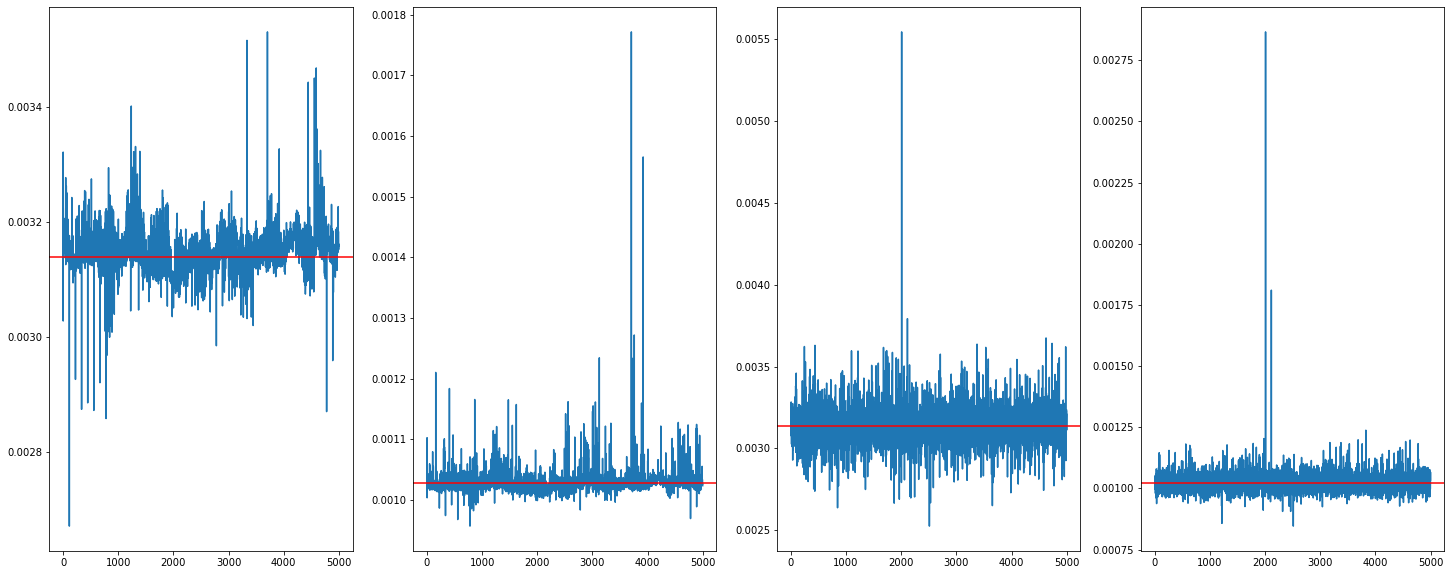

In [14]:
plot_traces__width("Zedigh_2021", "office_corridor", 10, 9)

### 10m - Device 10

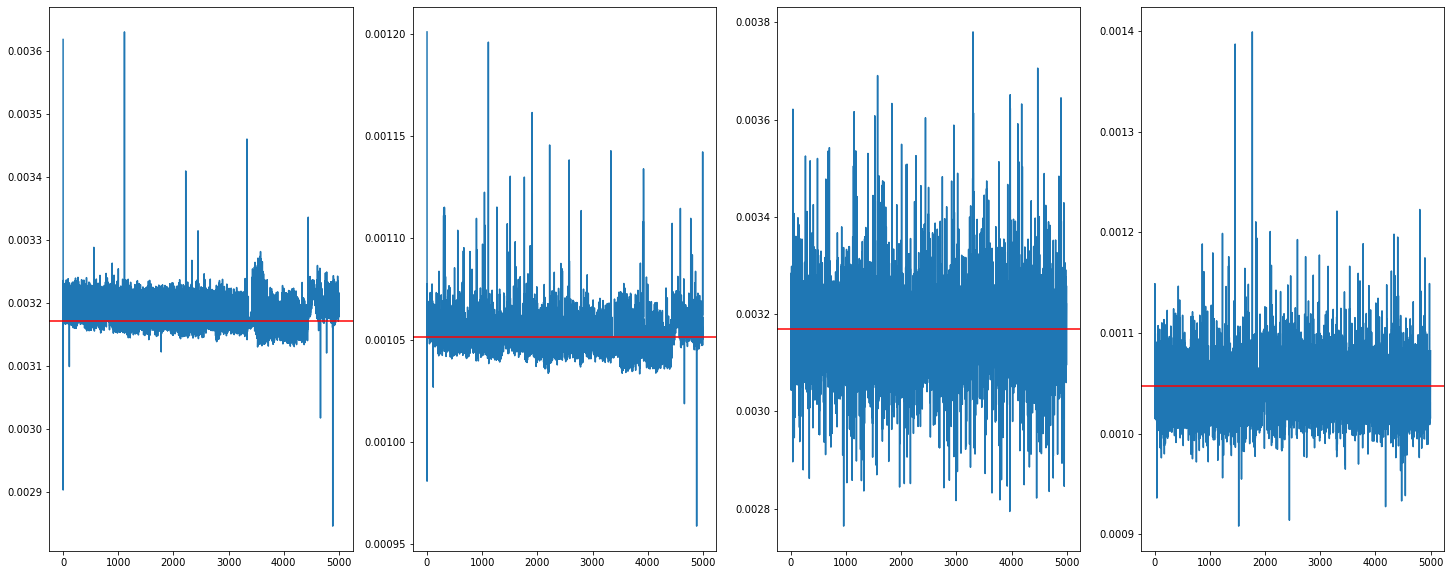

In [15]:
plot_traces__width("Zedigh_2021", "office_corridor", 10, 10)